In [1]:
!pip install gensim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [4]:
import gensim.downloader as api

#wv = api.load('word2vec-google-news-300')

#vec_king = wv['king']

In [5]:
#vec_king

In [6]:
import pandas as pd
messages=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reddit_data.csv')

In [7]:
messages.shape

(20126, 1)

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [9]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import nltk
messages.columns
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['comments'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, messages['comments']) if i<1]

[[0, '', '👏👏👏'],
 [0, '', 'This.'],
 [0, '', 'Why?'],
 [0, '', '?'],
 [0, '', 'What?'],
 [0, '', '😂😂😂😂'],
 [0, '', 'Why?'],
 [0, '', '👏🏼👏🏼👏🏼👏🏼'],
 [0, '', '👍🏼'],
 [0, '', '🙌🏽'],
 [0, '', '😂'],
 [0, '', "That's why they don't"],
 [0, '', 'This'],
 [0, '', 'No, they don’t.'],
 [0, '', 'What?'],
 [0, '', '👏🏻'],
 [0, '', '👍🏼'],
 [0, '', '😂'],
 [0, '', '❤️'],
 [0, '', 'Why not?'],
 [0, '', 'Why not?'],
 [0, '', '🇱🇻✊💜🇵🇸'],
 [0, '', 'A'],
 [0, '', 'No he’s not.'],
 [0, '', 'T'],
 [0, '', "No it doesn't"],
 [0, '', 'A'],
 [0, '', 'So?'],
 [0, '', 'Some do, most don’t.'],
 [0, '', "Who doesn't"],
 [0, '', 'What now?'],
 [0, '', 'When was this!?'],
 [0, '', '?'],
 [0, '', '🤮'],
 [0, '', "Aren't they all..."],
 [0, '', '😂'],
 [0, '', 'Who has?'],
 [0, '', "That's what they're doing"],
 [0, '', 'so you do?'],
 [0, '', 'How so?'],
 [0,
  '',
  'ממשיך העונש נגד המחבלים של חמס יומם ולילה. כל הכבוד לכוחות של אוויר. עם ישראל חי.'],
 [0, '', '🇮🇱'],
 [0,
  '',
  'שילך הביתה כבר. חלאס. קשה יותר לנצח עם בי

In [13]:
nltk.download('punkt')
corpus[1]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'believe release hostage passed lip everyone talked hanging different experience'

In [14]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [15]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))


In [16]:
words[1]

['believe',
 'release',
 'hostage',
 'passed',
 'lip',
 'everyone',
 'talked',
 'hanging',
 'different',
 'experience']

In [17]:
from collections import Counter

counts = Counter()

for word in words:
  counts.update(word)

print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < 2:
        del counts[word]
print("num_words after:",len(counts.keys()))

num_words before: 21502
num_words after: 12680


In [18]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize

lst = [word for sentence in corpus for word in word_tokenize(sentence)]
freq_dist = FreqDist(lst)
print(freq_dist.most_common(20))

[('israel', 9171), ('hamas', 7145), ('people', 5115), ('palestinian', 4174), ('like', 2882), ('would', 2864), ('gaza', 2798), ('israeli', 2584), ('war', 2459), ('one', 2391), ('right', 2362), ('state', 2249), ('civilian', 2245), ('jew', 2232), ('http', 2149), ('hospital', 2094), ('u', 2085), ('think', 2067), ('even', 1911), ('know', 1789)]


In [19]:
rare_threshold = 10000
rare_words = [word for word, freq in freq_dist.items() if freq < rare_threshold]

In [20]:
len(rare_words)

22978

In [21]:
from string import punctuation

In [22]:
import gensim

In [23]:
## Lets train Word2vec from scratch
model=gensim.models.Word2Vec(words)

In [24]:
## To Get All the Vocabulary
#model.wv.index_to_key

In [25]:
model.corpus_count

20013

In [26]:
model.epochs

5

In [27]:
#model.wv.similar_by_word('gaza')

In [28]:
#model.wv['gaza'].shape

In [29]:
words[0]

['political',
 'battle',
 'ground',
 'subreddit',
 'please',
 'read',
 'rule',
 'commenting',
 'total',
 'karma',
 'account',
 'age',
 'threshold',
 'required',
 'post',
 'comment',
 'bot',
 'action',
 'performed',
 'automatically',
 'please',
 'contact',
 'moderator',
 'subreddit',
 'message',
 'compose',
 'question',
 'concern']

In [30]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)

    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [31]:
!pip install tqdm

In [32]:
from tqdm import tqdm

In [33]:
#apply for the entire sentences
import numpy as np
X=[]
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

  0%|          | 74/20013 [00:00<00:29, 683.94it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 20013/20013 [00:33<00:00, 602.16it/s]


In [34]:
len(X)

20013

In [35]:
##independent Features
X_new=np.array(X)

<ipython-input-35-c24378517c84>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_new=np.array(X)


In [36]:
messages.shape

(20126, 1)

In [37]:
X[1]

array([-0.4375585 , -0.06547455,  0.2979662 ,  0.15605795,  0.04759654,
       -0.11285371,  0.03962148,  0.61491907, -0.1208159 , -0.3287122 ,
       -0.60526836, -0.29093316, -0.03839351,  0.11431178,  0.1069987 ,
       -0.17466047, -0.02108192, -0.09062736,  0.10211521, -0.4468975 ,
        0.1321076 ,  0.14053485,  0.25403956, -0.25754339,  0.0442775 ,
       -0.16000223, -0.05352361, -0.22034213, -0.2504243 , -0.1282406 ,
        0.06948695,  0.27561268, -0.08138309, -0.19681755, -0.0501806 ,
        0.0890331 , -0.2008454 , -0.46454865, -0.04968545, -0.03587383,
        0.29450452, -0.00680518, -0.38943607, -0.2654754 ,  0.17441164,
       -0.12260081,  0.20008247, -0.03741591,  0.1693197 , -0.03237335,
        0.27451327, -0.0729777 , -0.2976389 ,  0.26217806, -0.25852197,
        0.43974128, -0.25107607, -0.27489915, -0.20586102, -0.02873691,
        0.09701711,  0.2923158 , -0.2752861 , -0.04944896, -0.29472703,
        0.08653687, -0.06245935,  0.18361369, -0.31038383,  0.20

In [38]:
X_new.shape

(20013,)

In [39]:
X_new[0].reshape(1,-1).shape

(1, 100)

In [40]:
X[0].reshape(1,-1).shape

(1, 100)

In [41]:
## this is the final independent features
df=pd.DataFrame()
for i in range(0,len(X)):
    df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)


<ipython-input-41-7fa5ca399bbd>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)


In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.562567,0.119575,-0.056800,0.317967,-0.159805,-0.779016,0.523151,1.610213,0.219439,-0.272710,...,0.321141,0.307036,0.260426,0.297841,0.652531,0.089393,0.390230,-0.260490,0.119988,0.515999
1,-0.437559,-0.065475,0.297966,0.156058,0.047597,-0.112854,0.039621,0.614919,-0.120816,-0.328712,...,0.349726,-0.236225,-0.067723,0.067263,0.288401,0.388899,0.162692,-0.211555,-0.005216,0.111298
2,-0.504864,0.147962,0.348421,0.095138,0.061810,-0.151647,0.060108,0.690402,-0.108339,-0.395395,...,0.384549,-0.067467,-0.098169,-0.038740,0.402454,0.498778,0.201964,-0.293623,0.014504,0.121422
3,-0.777251,-0.082783,0.562266,0.118578,-0.031383,-0.326192,-0.080168,0.814877,-0.223513,-0.162906,...,0.427714,-0.069507,-0.172344,-0.101649,0.138364,0.733153,0.306940,-0.296935,-0.103286,0.095243
4,-0.489629,0.374634,0.414775,0.339701,0.003913,-0.299792,0.043135,0.952199,-0.149080,-0.558790,...,0.510860,-0.220567,-0.272267,-0.020095,0.596693,0.551375,0.101170,-0.225438,-0.291391,0.032837


In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

In [45]:
## Independent Feature
X=df.copy()

In [46]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

In [47]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
scaler.fit(df)

StandardScaler()

In [50]:
scaled_data=scaler.transform(df)

In [51]:
data_pca=pca.fit_transform(scaled_data)

In [52]:
data_pca

array([[13.659573  , -7.6344585 ],
       [-0.6158971 ,  2.8959258 ],
       [-2.27847   ,  1.7589004 ],
       ...,
       [ 8.090972  ,  0.34328738],
       [-1.5526619 , -2.9520926 ],
       [ 1.7329868 , -2.2571106 ]], dtype=float32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

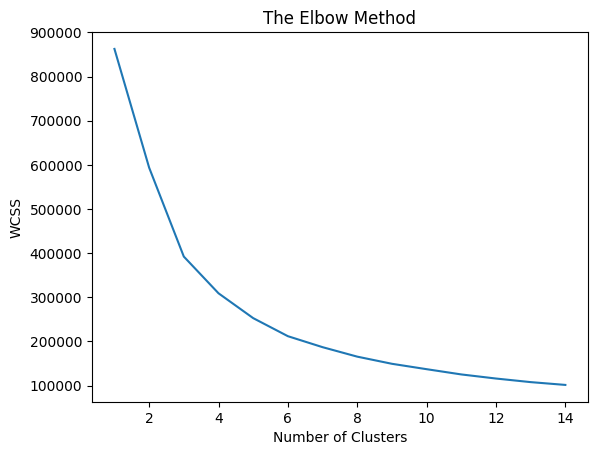

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.44539526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.4165279


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3484167


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3328838


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3338312


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.3195556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.33303565


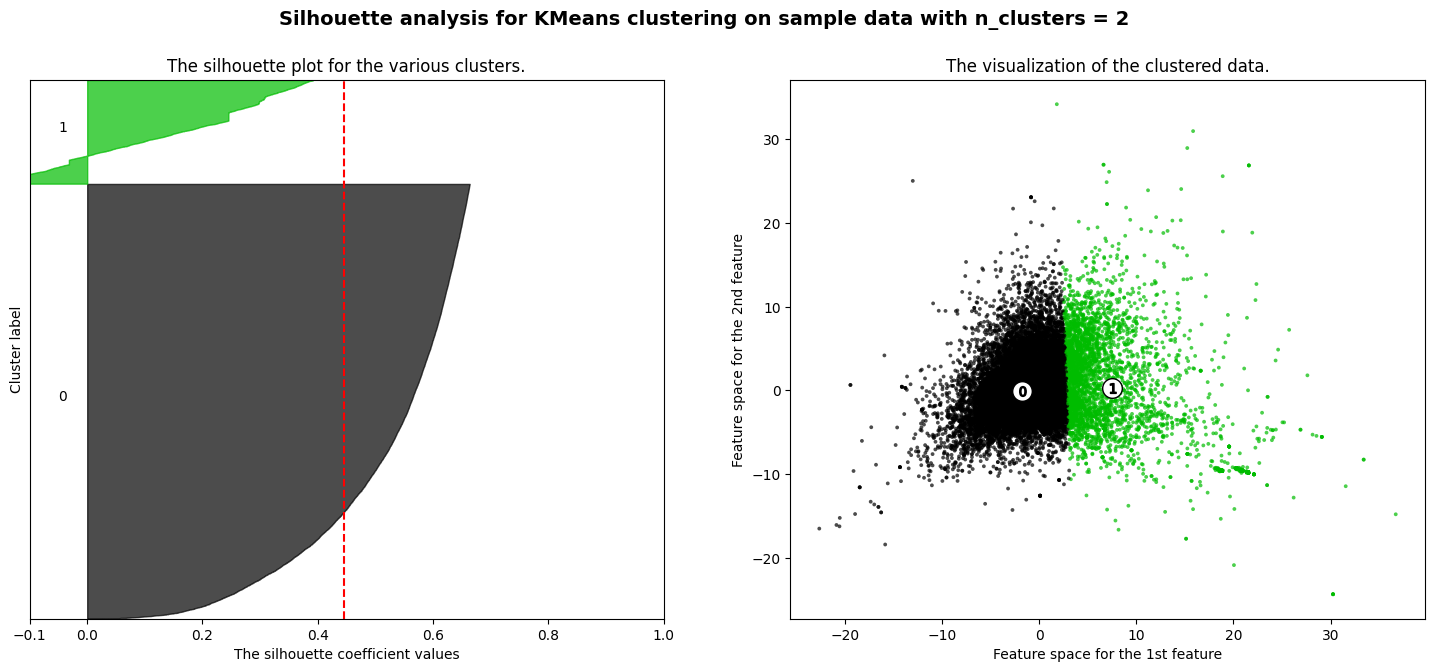

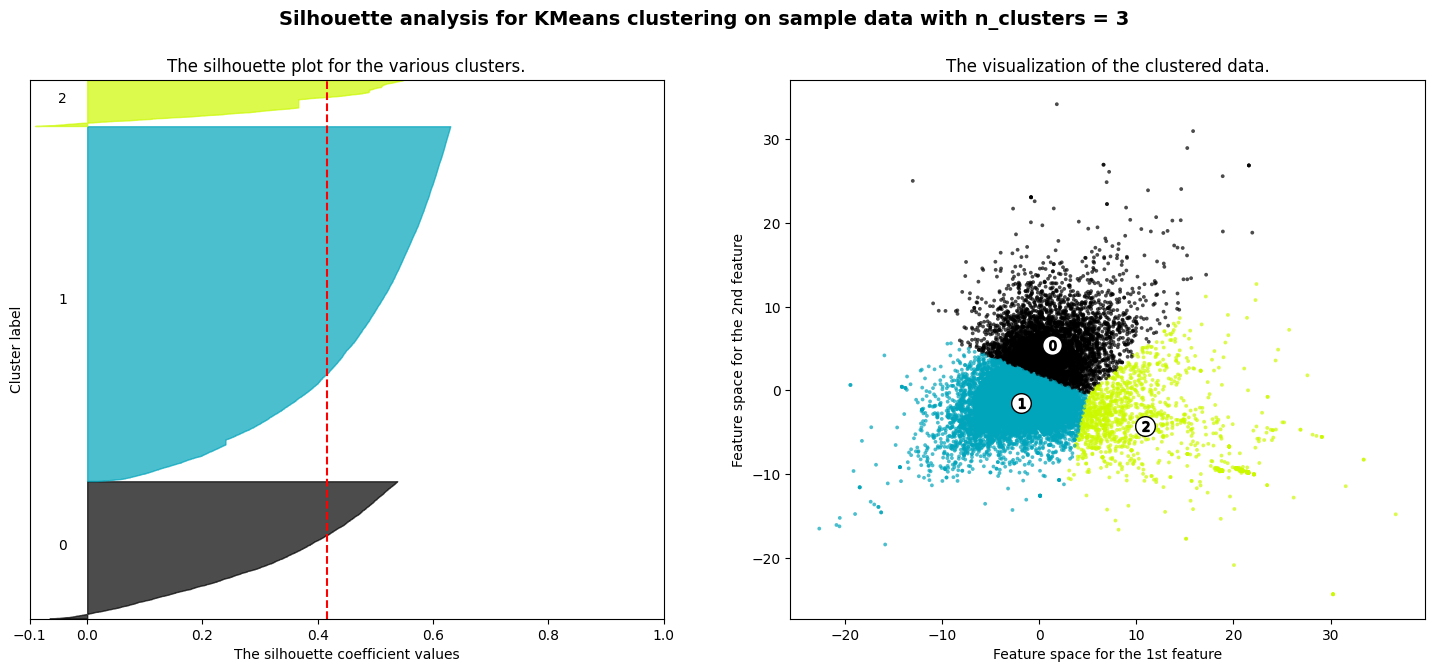

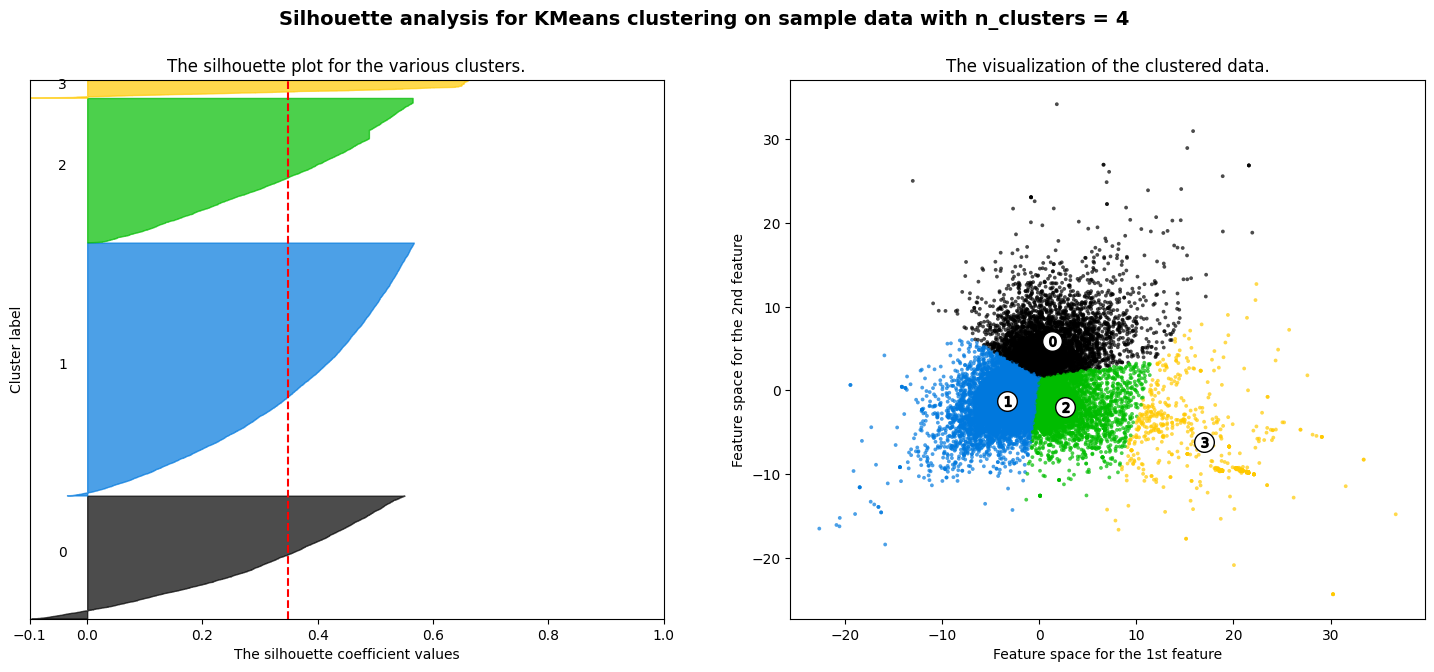

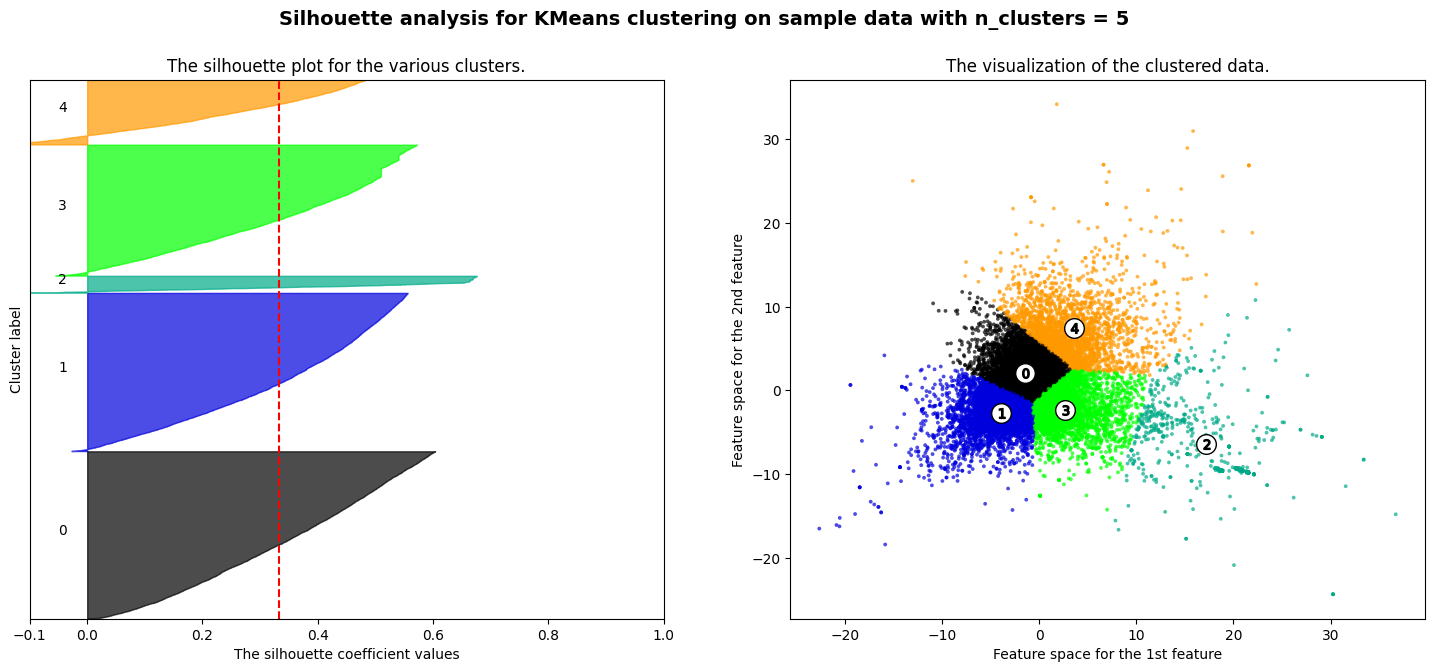

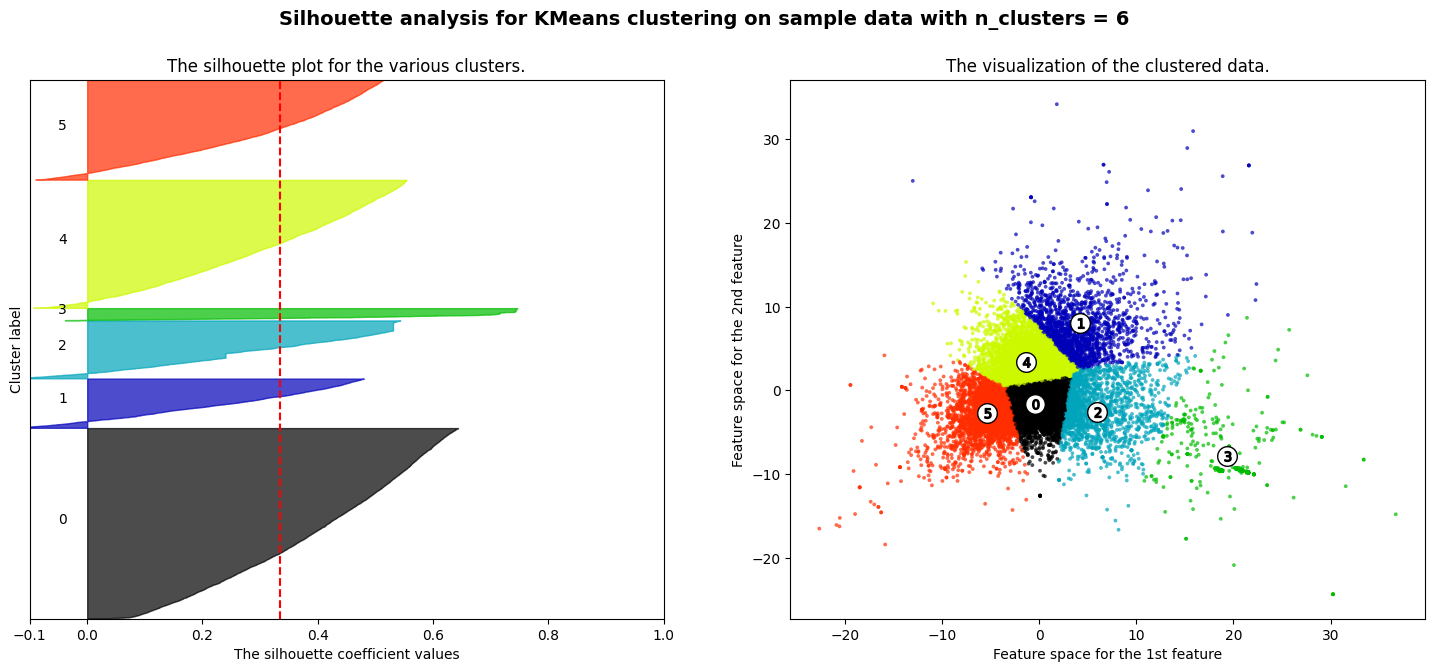

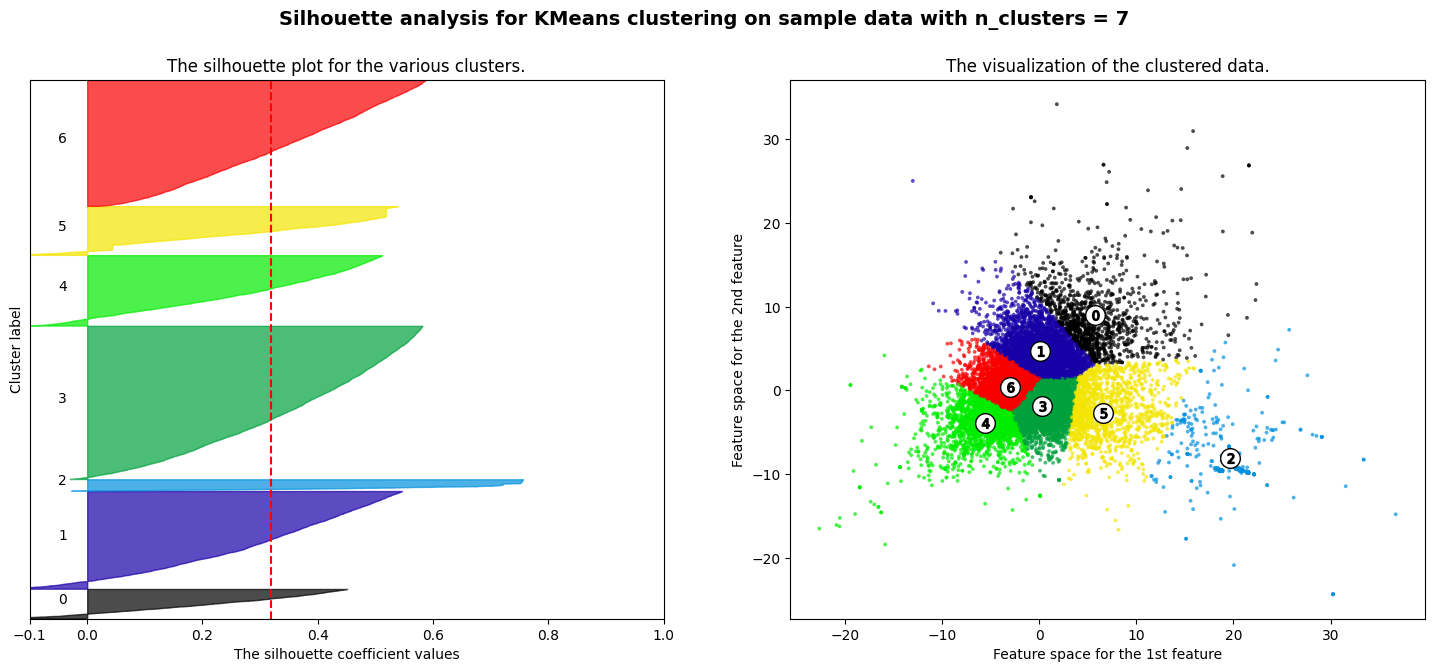

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_pca[:, 0], data_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
clusterer = KMeans(n_clusters=5, random_state=0)
cluster_labels = clusterer.fit_predict(data_pca)
print(cluster_labels)

In [ ]:
len(cluster_labels)

In [ ]:
len(df)

In [90]:
df.insert(0, 'Cluster', clusterer.labels_)

# show the first 10 observations
df.head(10)

,Cluster,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1,-0.562567,0.119575,-0.056800,0.317967,-0.159805,-0.779016,0.523151,1.610213,0.219439,...,0.321141,0.307036,0.260426,0.297841,0.652531,0.089393,0.390230,-0.260490,0.119988,0.515999
1,2,-0.437559,-0.065475,0.297966,0.156058,0.047597,-0.112854,0.039621,0.614919,-0.120816,...,0.349726,-0.236225,-0.067723,0.067263,0.288401,0.388899,0.162692,-0.211555,-0.005216,0.111298
2,0,-0.504864,0.147962,0.348421,0.095138,0.061810,-0.151647,0.060108,0.690402,-0.108339,...,0.384549,-0.067467,-0.098169,-0.038740,0.402454,0.498778,0.201964,-0.293623,0.014504,0.121422
3,0,-0.777251,-0.082783,0.562266,0.118578,-0.031383,-0.326192,-0.080168,0.814877,-0.223513,...,0.427714,-0.069507,-0.172344,-0.101649,0.138364,0.733153,0.306940,-0.296935,-0.103286,0.095243
4,0,-0.489629,0.374634,0.414775,0.339701,0.003913,-0.299792,0.043135,0.952199,-0.149080,...,0.510860,-0.220567,-0.272267,-0.020095,0.596693,0.551375,0.101170,-0.225438,-0.291391,0.032837
5,2,-0.689067,-0.052533,0.517281,0.059474,0.206179,0.015256,0.254333,0.736709,-0.006388,...,0.221626,-0.124374,-0.052152,-0.191637,0.301973,0.516318,0.285279,-0.077637,0.391170,0.148131
6,0,-0.365880,0.111466,0.288945,0.105884,-0.089200,-0.238489,0.058878,0.724884,-0.167926,...,0.351536,0.027006,-0.053666,0.116017,0.447917,0.377796,0.077106,-0.290649,-0.083367,0.012945
7,0,-0.510069,0.136695,0.337690,0.083220,0.027144,-0.190661,0.054300,0.719566,-0.178820,...,0.466733,-0.118738,-0.084144,0.001165,0.439589,0.486224,0.203461,-0.346342,-0.057249,0.111177
8,0,-0.419320,0.073158,0.324036,0.122729,-0.024741,-0.253773,0.041660,0.741622,-0.187435,...,0.396721,-0.016241,-0.116860,0.078908,0.456270,0.429781,0.115379,-0.326186,-0.063926,0.046019
9,0,-0.489811,0.002681,0.275876,0.041123,0.034621,-0.206279,0.140718,0.678451,-0.115323,...,0.369923,-0.021684,-0.017681,-0.000976,0.339512,0.394269,0.262096,-0.370046,0.113671,0.172884


In [91]:
X_train=df.drop('Cluster',axis=1)

In [92]:
X_train[0:1].values.reshape(-1,1).shape

(100, 1)

In [93]:
len([[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus,words ) if i<1])

113

In [64]:
len(words)

20013

In [65]:
len(corpus)

20126

In [67]:
re2=pd.DataFrame(X_new)

In [68]:
re3=pd.DataFrame(np.array(words))

<ipython-input-68-deb75778cc89>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  re3=pd.DataFrame(np.array(words))


In [70]:
re4=re3[~re2.isnull()[0]]

In [71]:
re4

,0
0,"[political, battle, ground, subreddit, please,..."
1,"[believe, release, hostage, passed, lip, every..."
2,"[think, fact, happened, far, away, help, peopl..."
3,"[mean, pretty, sure, assumed, everyone, want, ..."
4,"[hamas, release, hostage, turn, war, would, tr..."
...,...
20008,"[article, israeli, war, crime, amnesty, intern..."
20009,"[amnesty, international, antisemitic, core, re..."
20010,"[article, israeli, war, crime, haaretz, israel..."
20011,"[surprised, haaretz, left, wing, newspaper, bi..."


In [72]:
re5=re4.reset_index().drop('index',axis=1)

In [73]:
'''cor=[]
st=''
for i in range(0,len(re5)):
  for wordd in re5.loc[i,0]:
    st=st+" "+str(wordd)
  cor.append(st)
len(cor)'''

'cor=[]\nst=\'\'\nfor i in range(0,len(re5)):\n  for wordd in re5.loc[i,0]:\n    st=st+" "+str(wordd)\n  cor.append(st)\nlen(cor)'

In [74]:
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok

detok=Detok()

cor=[detok.detokenize(re5.loc[i,0]) for i in range(0,len(re5))]

In [75]:
len(cor)

19908

In [76]:
final=pd.DataFrame(cor,columns=['Comments'])

In [77]:
clusterer = KMeans(n_clusters=3, random_state=0)
cluster_labels = clusterer.fit_predict(data_pca)
print(cluster_labels)

[1 2 0 ... 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
final.insert(1, 'Cluster', clusterer.labels_)

In [79]:
final.head()

,Comments,Cluster
0,political battle ground subreddit please read ...,1
1,believe release hostage passed lip everyone ta...,2
2,think fact happened far away help people suppo...,0
3,mean pretty sure assumed everyone want terrori...,0
4,hamas release hostage turn war would tragedy h...,0


In [80]:
final.to_csv('Cluster_war.csv',index=False)

In [81]:
final.isnull().sum()

Comments    0
Cluster     0
dtype: int64

In [82]:
len(final)

19908

In [83]:
re5

,0
0,"[political, battle, ground, subreddit, please,..."
1,"[believe, release, hostage, passed, lip, every..."
2,"[think, fact, happened, far, away, help, peopl..."
3,"[mean, pretty, sure, assumed, everyone, want, ..."
4,"[hamas, release, hostage, turn, war, would, tr..."
...,...
19903,"[article, israeli, war, crime, amnesty, intern..."
19904,"[amnesty, international, antisemitic, core, re..."
19905,"[article, israeli, war, crime, haaretz, israel..."
19906,"[surprised, haaretz, left, wing, newspaper, bi..."


In [87]:
sam=pd.read_csv('Cluster_war.csv')
len(sam)

19908

In [86]:
sam.head()

,Comments,Cluster
0,political battle ground subreddit please read ...,1
1,believe release hostage passed lip everyone ta...,2
2,think fact happened far away help people suppo...,0
3,mean pretty sure assumed everyone want terrori...,0
4,hamas release hostage turn war would tragedy h...,0


In [94]:
df.head()

,Cluster,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1,-0.562567,0.119575,-0.056800,0.317967,-0.159805,-0.779016,0.523151,1.610213,0.219439,...,0.321141,0.307036,0.260426,0.297841,0.652531,0.089393,0.390230,-0.260490,0.119988,0.515999
1,2,-0.437559,-0.065475,0.297966,0.156058,0.047597,-0.112854,0.039621,0.614919,-0.120816,...,0.349726,-0.236225,-0.067723,0.067263,0.288401,0.388899,0.162692,-0.211555,-0.005216,0.111298
2,0,-0.504864,0.147962,0.348421,0.095138,0.061810,-0.151647,0.060108,0.690402,-0.108339,...,0.384549,-0.067467,-0.098169,-0.038740,0.402454,0.498778,0.201964,-0.293623,0.014504,0.121422
3,0,-0.777251,-0.082783,0.562266,0.118578,-0.031383,-0.326192,-0.080168,0.814877,-0.223513,...,0.427714,-0.069507,-0.172344,-0.101649,0.138364,0.733153,0.306940,-0.296935,-0.103286,0.095243
4,0,-0.489629,0.374634,0.414775,0.339701,0.003913,-0.299792,0.043135,0.952199,-0.149080,...,0.510860,-0.220567,-0.272267,-0.020095,0.596693,0.551375,0.101170,-0.225438,-0.291391,0.032837


In [95]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [97]:
X=df.drop('Cluster',axis=1)
y=df['Cluster']

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [100]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [102]:
X_test[0:5]

array([[ 0.9462487 ,  1.959943  ],
       [-3.6067255 ,  0.9959492 ],
       [-3.4739752 , -0.94541967],
       [-2.6780596 , -0.9191175 ],
       [-3.8384721 ,  1.7729069 ]], dtype=float32)

In [105]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [109]:
models ={
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'SVM' : SVC(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'XGBoost' : XGBClassifier(),
    'CatBoost' : CatBoostClassifier()
}

In [118]:
parameter = {
    'Logistic Regression': {},
    'KNN': {
            'n_neighbors':[2,3,4,5,6,7,8,9,10,11],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                },
    'Random Forest' : {
                    'criterion':['gini', 'entropy', 'log_loss'],
                    'max_features':['sqrt','log2',None],
                    'n_estimators': [8,16,32,64,128,256]

                },
    'AdaBoost' :{
                'learning_rate':[.1,.01,0.5,.001],
                'algorithm': ['SAMME','SAMME.R'],
                'n_estimators': [8,16,32,64,128,256]
                },
    'SVM' : {},
    'Gradient Boosting' : {
                          'loss': ['log_loss', 'exponential'],
                          'learning_rate':[.1,.01,.05,.001],
                          'criterion':['squared_error', 'friedman_mse'],
                          'max_features':['sqrt','log2'],
                          'n_estimators': [8,16,32,64,128,256]
                },
    'Decision Tree' : {
                  'criterion':['gini', 'entropy', 'log_loss'],
                  'splitter':['best','random'],
                  'max_features':['auto','sqrt','log2'],
                },
    'XGBoost' : {
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                },
    'CatBoost' : {
                    'depth': [6,8,10],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'iterations': [30, 50, 100]
                }
}

In [115]:
def evaluate_models(X_train, y_train,X_test,y_test,models,param):
  report = {}

  for i in range(len(list(models))):
    model = list(models.values())[i]
    para=param[list(models.keys())[i]]
    print(model,para)

    gs = GridSearchCV(model,para,cv=3)
    gs.fit(X_train,y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_model_score = accuracy_score(y_train, y_train_pred)

    test_model_score = accuracy_score(y_test, y_test_pred)

    print('Accuracy:',test_model_score)

    report[list(models.keys())[i]] = test_model_score

  return report

In [119]:
model_report:dict=evaluate_models(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param=parameter)

LogisticRegression() {}
Accuracy: 0.997869101978691
KNeighborsClassifier() {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
Accuracy: 0.995738203957382
RandomForestClassifier(n_estimators=256) {'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'n_estimators': [8, 16, 32, 64, 128, 256]}
Accuracy: 0.9940639269406393
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=256) {'learning_rate': [0.1, 0.01, 0.5, 0.001], 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [8, 16, 32, 64, 128, 256]}
Accuracy: 0.9665144596651446
SVC() {}
Accuracy: 0.9980213089802131
GradientBoostingClassifier() {'loss': ['log_loss', 'exponential'], 'learning_rate': [0.1, 0.01, 0.05, 0.001], 'criterion': ['squared_error', 'friedman_mse'], 'max_features': ['sqrt', 'log2'], 'n_estimators': [8, 16, 32, 64, 128, 256]}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
288 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 444, in fit
    self._check_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 301, in _check_params
    self._loss = loss_class(self.n_classes_)
  File "/usr/local/lib/python3.10/dist-packages/skl

Accuracy: 0.993607305936073
DecisionTreeClassifier() {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Streaming output truncated to the last 5000 lines.
1:	learn: 1.0637064	total: 9.45ms	remaining: 132ms
2:	learn: 1.0470202	total: 14ms	remaining: 126ms
3:	learn: 1.0307456	total: 18.7ms	remaining: 122ms
4:	learn: 1.0149167	total: 23.3ms	remaining: 116ms
5:	learn: 0.9995823	total: 28ms	remaining: 112ms
6:	learn: 0.9844781	total: 32.7ms	remaining: 107ms
7:	learn: 0.9698768	total: 37.3ms	remaining: 103ms
8:	learn: 0.9554683	total: 42ms	remaining: 98ms
9:	learn: 0.9414351	total: 46.7ms	remaining: 93.4ms
10:	learn: 0.9276516	total: 51.4ms	remaining: 88.8ms
11:	learn: 0.9144843	total: 56ms	remaining: 83.9ms
12:	learn: 0.9017297	total: 60.5ms	remaining: 79.1ms
13:	learn: 0.8887886	total: 65.1ms	remaining: 74.4ms
14:	learn: 0.8764892	total: 69.7ms	remaining: 69.7ms
15:	learn: 0.8642654	total: 74.3ms	remaining: 65ms
16:	learn: 0.8524247	total: 78.9ms	remaining: 60.3ms
17:	learn: 0.8408078	total: 83.5ms	remaining: 55.6ms
18:	learn: 0.8293355	total: 88.2ms	remaining: 51.1ms
19:	learn: 0.8181355	to

In [120]:
best_model_score = max(sorted(model_report.values()))

## To get best model name from dict

best_model_name = list(model_report.keys())[
  list(model_report.values()).index(best_model_score)
]

best_model = models[best_model_name]

print(best_model_name)

SVM


In [121]:
y_pred=best_model.predict(X_test)

In [122]:
confusion_matrix(y_test,y_pred)

array([[4325,    1,    1],
       [   2,  569,    0],
       [   6,    3, 1663]])

In [123]:
accuracy_score(y_test,y_pred)

0.9980213089802131

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4327
           1       0.99      1.00      0.99       571
           2       1.00      0.99      1.00      1672

    accuracy                           1.00      6570
   macro avg       1.00      1.00      1.00      6570
weighted avg       1.00      1.00      1.00      6570



In [133]:
import pickle
import os

trained_model_file_path=os.path.join("/content/drive/MyDrive/Cluster_war","cluster_model.pkl")
with open(trained_model_file_path, "wb") as file_obj:
  pickle.dump(best_model,file_obj)

In [134]:
def load_object(file_path):
  with open(file_path, "rb") as file_obj:
    return pickle.load(file_obj)

In [136]:
model=load_object(trained_model_file_path)

In [139]:
y_pred=model.predict(X_test)

In [140]:
confusion_matrix(y_test,y_pred)

array([[4325,    1,    1],
       [   2,  569,    0],
       [   6,    3, 1663]])

In [141]:
accuracy_score(y_test,y_pred)

0.9980213089802131

In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4327
           1       0.99      1.00      0.99       571
           2       1.00      0.99      1.00      1672

    accuracy                           1.00      6570
   macro avg       1.00      1.00      1.00      6570
weighted avg       1.00      1.00      1.00      6570

